## Tabla de Muestra

In [3]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

site = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
header = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=header)
page = urlopen(req)
soup = BeautifulSoup(page, "lxml")
table = soup.find('table', id="constituents")

#column "TICKER"
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].get_text()
    tickers.append(ticker)

ticker = [n.replace('\n','').replace('.','-') for n in tickers]

#column "COMPANY"
company = []
for row in table.findAll('tr')[1:]:
    name = row.findAll('td')[1].get_text()
    company.append(name)

company = [n.replace('\n', '') for n in company]

#column "SECTOR"
sector = []
for row in table.findAll('tr')[1:]:
    name = row.findAll('td')[3].get_text()
    sector.append(name)

sector = [n.replace('\n', '') for n in sector]

#column "INDUSTRY"
industry = []
for row in table.findAll('tr')[1:]:
    name = row.findAll('td')[4].get_text()
    industry.append(name)

industry = [n.replace('\n', '') for n in industry]

In [4]:
df_SP = pd.DataFrame()
df_SP['TICKER'] = ticker
df_SP['COMPANY'] = company
df_SP['SECTOR'] = sector
df_SP['INDUSTRY'] = industry
df_SP.head()

,TICKER,COMPANY,SECTOR,INDUSTRY
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## Rentabilidad Anual (ROI)

Tomaremos como ejemplo a la compañia 3M

In [13]:
df_mmm = yf.download('MMM', start='2000-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [193]:
AdjClose_mmm = df_mmm['Adj Close']
dfp = pd.DataFrame()
dfp['Fecha'] = df_mmm['Date']
dfp['Ajuste_Cierre'] = AdjClose_mmm

In [194]:
lista = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
Roi = []
for m in lista:
    df = dfp.loc[(dfp['Fecha']>= str(m) + '-01-01') & (dfp['Fecha']<= str(m) + '-12-31' )]
    df.reset_index(inplace=True, drop=True)
    first = df.loc[0,['Ajuste_Cierre']]
    last = df.loc[df.shape[0] - 1,['Ajuste_Cierre']]
    rentabilidad_anual = ((last - first)/first )*100
    roi = round(float(rentabilidad_anual),2)
    Roi.append(roi)

df = pd.DataFrame()
df['AÑO'] = lista
df['ROI (%)'] = Roi

df.head(3)

,AÑO,ROI (%)
0,2000,30.93
1,2001,1.30
2,2002,7.39


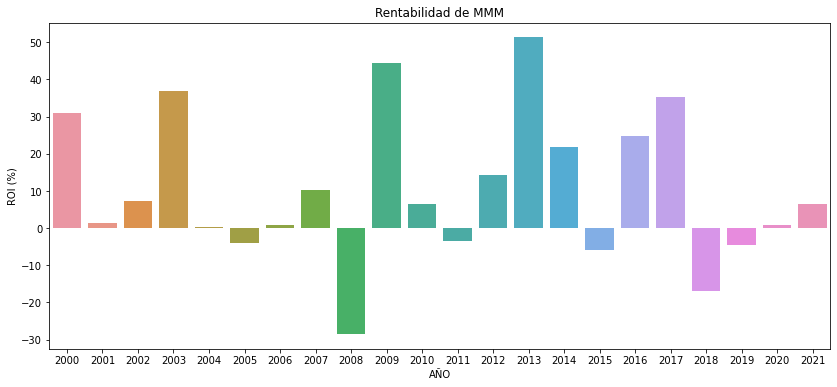

In [204]:
plt.figure(figsize=(14,6))
plt.title('Rentabilidad de MMM')
sns.barplot(data = df, x='AÑO', y='ROI (%)')
plt.show()

## Volatilidad

In [63]:
df = yf.download('^GSPC', start='2000-01-01')
va = df['Adj Close'].pct_change()
m = va.rolling(250).std()*100*(250)**0.5

[*********************100%***********************]  1 of 1 completed


In [68]:
daily = va.mean()
year = ((1 + daily)**252)-1
year

0.06782184529731361

In [4]:
from scipy.signal import find_peaks
peaks, _ =find_peaks(m, prominence=8)

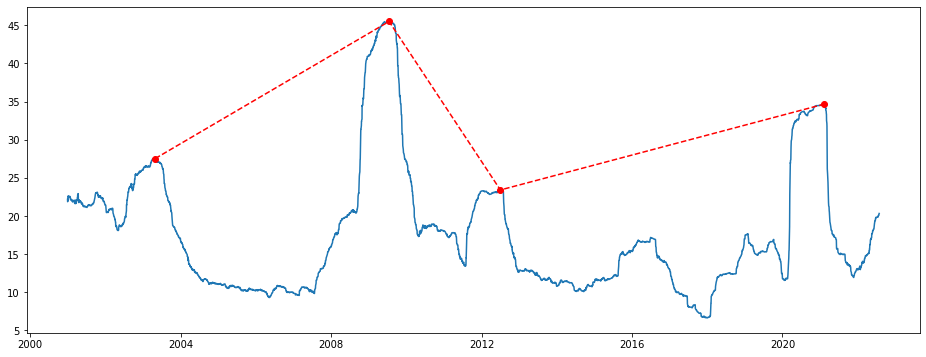

Fechas de mayor volatilidad para el sp&500: 
28-04-2003
17-07-2009
02-07-2012
08-02-2021


In [12]:
plt.figure(figsize=(16,6))
plt.plot(m)
plt.plot(m[peaks],  marker='o', linestyle='dashed', color='red')
plt.show()

print("Fechas de mayor volatilidad para el sp&500: ")
for i in list(m[peaks].index.strftime('%d-%m-%Y')):
    print(i)

## Análisis de Inversión

In [134]:
mmm = yf.Ticker('TSLA')

In [70]:
mmm.info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'f

In [115]:
for i in ['targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash']:    
    print(i,': ', mmm.info.get(i))

targetLowPrice :  118
recommendationKey :  hold
grossProfits :  16579000000
freeCashflow :  3149250048
targetMedianPrice :  145
currentPrice :  141.425
earningsGrowth :  -0.947
currentRatio :  1.467
returnOnAssets :  0.073860005
numberOfAnalystOpinions :  18
targetMeanPrice :  146.02
debtToEquity :  119.658
returnOnEquity :  0.2938
targetHighPrice :  210
totalCash :  2984000000


In [116]:
for i in ['totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds']:    
    print(i,': ', mmm.info.get(i))

totalDebt :  16531999744
totalRevenue :  35085000704
totalCashPerShare :  5.239
financialCurrency :  USD
revenuePerShare :  61.076
quickRatio :  0.798
recommendationMean :  3.4
exchange :  NYQ
shortName :  3M Company
longName :  3M Company
exchangeTimezoneName :  America/New_York
exchangeTimezoneShortName :  EDT
isEsgPopulated :  False
gmtOffSetMilliseconds :  -14400000


In [119]:
for i in ['quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'forwardEps', 'revenueQuarterlyGrowth', 'sharesOutstanding', 'fundInceptionDate', 'annualReportExpenseRatio', 'totalAssets', 'bookValue', 'sharesShort', 'sharesPercentSharesOut', 'fundFamily', 'lastFiscalYearEnd', 'heldPercentInstitutions']:    
    print(i,': ', mmm.info.get(i))

quoteType :  EQUITY
symbol :  MMM
messageBoardId :  finmb_289194
market :  us_market
annualHoldingsTurnover :  None
enterpriseToRevenue :  2.665
beta3Year :  None
enterpriseToEbitda :  12.542
52WeekChange :  -0.2908457
morningStarRiskRating :  None
forwardEps :  10.92
revenueQuarterlyGrowth :  None
sharesOutstanding :  569603968
fundInceptionDate :  None
annualReportExpenseRatio :  None
totalAssets :  None
bookValue :  24.255
sharesShort :  7765938
sharesPercentSharesOut :  0.0136
fundFamily :  None
lastFiscalYearEnd :  1640908800
heldPercentInstitutions :  0.67515


In [120]:
for i in ['netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'heldPercentInsiders', 'nextFiscalYearEnd', 'yield', 'mostRecentQuarter', 'shortRatio', 'sharesShortPreviousMonthDate', 'floatShares', 'beta', 'enterpriseValue', 'priceHint', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 'lastDividendDate']:    
    print(i,': ', mmm.info.get(i))

netIncomeToCommon :  4150000128
trailingEps :  7.16
lastDividendValue :  1.49
SandP52WeekChange :  -0.07344955
priceToBook :  5.8307567
heldPercentInsiders :  0.00085
nextFiscalYearEnd :  1703980800
yield :  None
mostRecentQuarter :  1656547200
shortRatio :  2.44
sharesShortPreviousMonthDate :  1655251200
floatShares :  569096981
beta :  0.945083
enterpriseValue :  93503299584
priceHint :  2
threeYearAverageReturn :  None
lastSplitDate :  1064880000
lastSplitFactor :  2:1
legalType :  None
lastDividendDate :  1652918400


In [121]:
for i in ['morningStarOverallRating', 'earningsQuarterlyGrowth', 'priceToSalesTrailing12Months', 'dateShortInterest', 'pegRatio', 'ytdReturn', 'forwardPE', 'lastCapGain', 'shortPercentOfFloat', 'sharesShortPriorMonth', 'impliedSharesOutstanding', 'category', 'fiveYearAverageReturn', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'regularMarketPreviousClose', 'fiftyDayAverage']:    
    print(i,': ', mmm.info.get(i))

morningStarOverallRating :  None
earningsQuarterlyGrowth :  -0.949
priceToSalesTrailing12Months :  2.3209987
dateShortInterest :  1657843200
pegRatio :  33.7
ytdReturn :  None
forwardPE :  12.951008
lastCapGain :  None
shortPercentOfFloat :  0.0137
sharesShortPriorMonth :  9123534
impliedSharesOutstanding :  0
category :  None
fiveYearAverageReturn :  None
previousClose :  140.37
regularMarketOpen :  140.77
twoHundredDayAverage :  157.47086
trailingAnnualDividendYield :  0.042316735
payoutRatio :  0.8296
volume24Hr :  None
regularMarketDayHigh :  141.7029
navPrice :  None
averageDailyVolume10Day :  3645370
regularMarketPreviousClose :  140.37
fiftyDayAverage :  137.144


In [135]:
print('sector: ',mmm.info.get('sector'))
print("Rentabilidad relativa de dos o más empresas de diferentes tamaños en la misma industria:")
print(' '*40,'margen EBITDA (beneficio operativo): ',mmm.info.get('ebitdaMargins'))
print('margen de beneficio: ',mmm.info.get('profitMargins'))
print('margen bruto: ',mmm.info.get('grossMargins'))
print('margen bruto: ',mmm.info.get('grossProfits'))
print('margen operacional: ',mmm.info.get('operatingCashflow'))
print('margen operacional (EBIT): ',mmm.info.get('operatingMargins'))
print('ebidta: ',mmm.info.get('ebitda'))

sector:  Consumer Cyclical
Rentabilidad relativa de dos o más empresas de diferentes tamaños en la misma industria:
                                         margen EBITDA (beneficio operativo):  0.20889
margen de beneficio:  0.14168
margen bruto:  0.27099
margen bruto:  13606000000
margen operacional:  14078000128
margen operacional (EBIT):  0.16139
ebidta:  14030000128


In [138]:
mmm.info.get('grossMargins')-mmm.info.get('operatingMargins')

0.1096

In [136]:
mmm.info['totalRevenue']

67165999104

In [125]:
mmm.info[ 'enterpriseToEbitda']

12.542

In [139]:
mmm.financials

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,2593000000.0,1491000000.0,1343000000.0,1460000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,6343000000.0,1154000000.0,-665000000.0,-1005000000.0
Minority Interest,1394000000.0,1454000000.0,1492000000.0,1390000000.0
Net Income,5519000000.0,721000000.0,-862000000.0,-976000000.0
Selling General Administrative,4517000000.0,3188000000.0,2646000000.0,2835000000.0
Gross Profit,13606000000.0,6630000000.0,4069000000.0,4042000000.0
Ebit,6523000000.0,1951000000.0,80000000.0,-253000000.0
Operating Income,6523000000.0,1951000000.0,80000000.0,-253000000.0
Other Operating Expenses,-27000000.0,-27000000.0,-27000000.0,-27000000.0


In [128]:
mmm.cashflow

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Investments,2.040000e+08,2.320000e+08,-1.920000e+08,6.690000e+08
Change To Liabilities,5.180000e+08,2.520000e+08,-1.170000e+08,4.080000e+08
Total Cashflows From Investing Activities,-1.317000e+09,-5.800000e+08,-6.444000e+09,2.220000e+08
Net Borrowings,-1.145000e+09,-1.875000e+09,3.249000e+09,9.330000e+08
Total Cash From Financing Activities,-6.145000e+09,-5.300000e+09,-1.124000e+09,-6.701000e+09
Issuance Of Stock,6.390000e+08,4.290000e+08,5.470000e+08,4.850000e+08
Net Income,5.921000e+09,5.449000e+09,4.517000e+09,5.349000e+09
Change In Cash,-7.000000e+07,2.281000e+09,-5.000000e+08,-2.000000e+08
Repurchase Of Stock,-2.199000e+09,-3.680000e+08,-1.407000e+09,-4.870000e+09
Effect Of Exchange Rate,-6.200000e+07,4.800000e+07,-2.000000e+06,-1.600000e+08


In [127]:
mmm.balancesheet

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Intangible Assets,5.288000e+09,5.835000e+09,6.379000e+09,2.657000e+09
Capital Surplus,6.429000e+09,6.162000e+09,5.907000e+09,5.643000e+09
Total Liab,3.195500e+10,3.441300e+10,3.453300e+10,2.665200e+10
Total Stockholder Equity,1.504600e+10,1.286700e+10,1.006300e+10,9.796000e+09
Minority Interest,7.100000e+07,6.400000e+07,6.300000e+07,5.200000e+07
Other Current Liab,2.090000e+09,2.346000e+09,2.092000e+09,1.852000e+09
Total Assets,4.707200e+10,4.734400e+10,4.465900e+10,3.650000e+10
Common Stock,9.000000e+06,9.000000e+06,9.000000e+06,9.000000e+06
Other Current Assets,2.290000e+08,1.930000e+08,7.190000e+08,2.460000e+08
Retained Earnings,4.582100e+10,4.382100e+10,4.213500e+10,4.063600e+10


variable de consideración: ganancia por año

In [71]:
mmm.earnings

,Revenue,Earnings
Year,,
2018,32765000000,5349000000
2019,32136000000,4517000000
2020,32184000000,5449000000
2021,35355000000,5921000000


variable de consideración: recomendación de los expertos:

In [36]:
mmm.recommendations[mmm.recommendations['To Grade'] == 'Buy'].tail()

,Firm,To Grade,From Grade,Action
Date,,,,
2018-04-25 12:18:54,Argus,Buy,Buy,main
2018-10-24 14:31:38,Citigroup,Buy,Buy,main
2018-10-24 15:27:54,Argus,Buy,Buy,main
2019-10-15 12:33:11,Citigroup,Buy,,main
2021-02-03 15:36:31,Argus Research,Buy,Hold,up
